## PROJECT NAME : PRCP- 1001- RiceLeaf disease detection

## PROJECT TEAM ID : PTID-CDS-APR-23-1492

## 1)Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:-Create a model which can classify the three major attacking diseases of
   rice plants like leaf blast, bacterial blight and brown spot.
* Task3:- Analyze various techniques like Data Augmentation, etc and create a
    report on that.

## 2) load the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import os
import pathlib
import PIL #Python Imaging Library
#pip install opencv-python
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import regularizers


### ImageDataGenerator 
* In ImageDataGenerator Itself it will generate some random images by taking some features of training images randomly.
* Hence o need of doing DATA  AUGUMENTATION Seperately while callig ImageDataGenerator.

* ImageDataGenerator is a class in Keras, a deep learning library, that allows you to perform data augmentation and create data generators for training deep learning models on image datasets. It provides a convenient way to preprocess and augment image data in real-time during model training.

### Data augmentation 
* It is a technique commonly used in computer vision tasks to artificially increase the size and diversity of the training dataset. By applying various transformations and modifications to the images, data augmentation helps the model generalize better and improve its ability to recognize and classify images.

In [2]:
# create the image generator
da1=ImageDataGenerator(rescale=1/255,fill_mode='nearest')

In [3]:
#load the  total image in given data set
total_image=da1.flow_from_directory("D:\ML dataset\leaf diseces\\full data",
    target_size=(220,220),
    batch_size=32,
        )
# load the split training image from total image
training_image=da1.flow_from_directory("D:\ML dataset\leaf diseces\\training",
    target_size=(220,220),
    batch_size=32,
        )
#load the split validation image from total image
validation_image=da1.flow_from_directory("D:\ML dataset\leaf diseces\\validation",
    target_size=(220,220),
    batch_size=32,
        )


Found 119 images belonging to 3 classes.
Found 97 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


## Domain analysis

* This dataset contains 119 jpg images of disease-infected rice leaves. The images are grouped into 3
 classes based on the type of disease. There are 40 images in each class.
 Classes
* Leaf smut -39 images
* Brown spot -40 images
* Bacterial leaf blight -40 images

* **training data:**
* given data set to split the training image 97 images belonging to 3 classes.

* **testing data:**
* given data set to split the testing image 23 images belonging to 3 classes.

## 3)EDA (Explolatory Data Analysis)

In [4]:
total_image.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

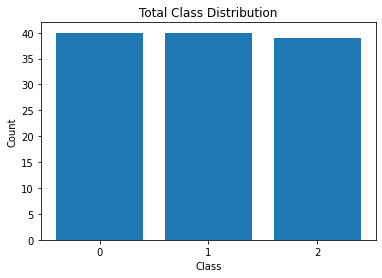

In [5]:
#check the total image in each count
class_counts = total_image.classes
unique_classes, class_counts = np.unique(class_counts, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Total Class Distribution')
plt.show()


In [6]:
# Getting the prefered class for the paticular images
training_image.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

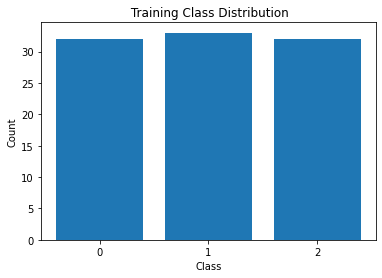

In [7]:
#training image each classes count
class_counts = training_image.classes
unique_classes, class_counts = np.unique(class_counts, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xticks(unique_classes)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title(' Training Class Distribution')
plt.show()

## Data Visualization


### Bacterial leaf blight

In [8]:
data_dir=pathlib.Path("D:\ML dataset\leaf diseces\\full data")
data_dir

WindowsPath('D:/ML dataset/leaf diseces/full data')

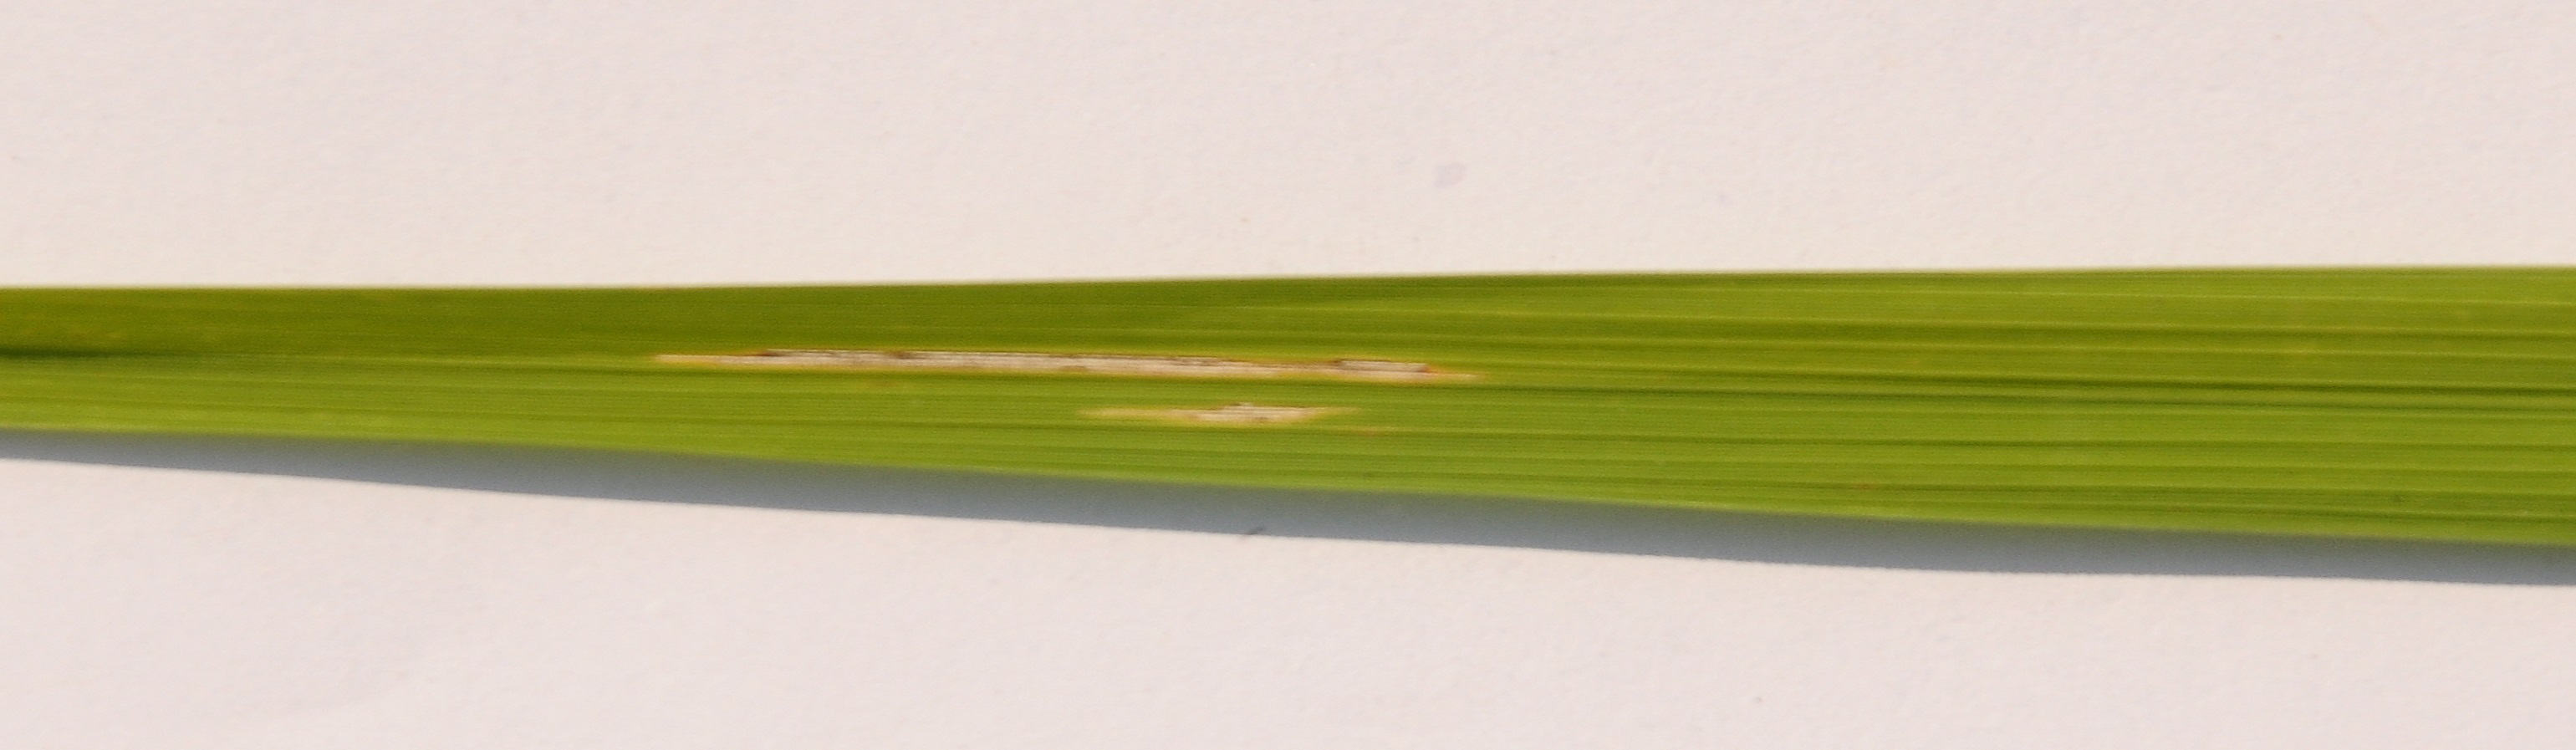

In [9]:
# open the sample bacteria image
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
PIL.Image.open(str(bacteria[2]))

### Brown spot

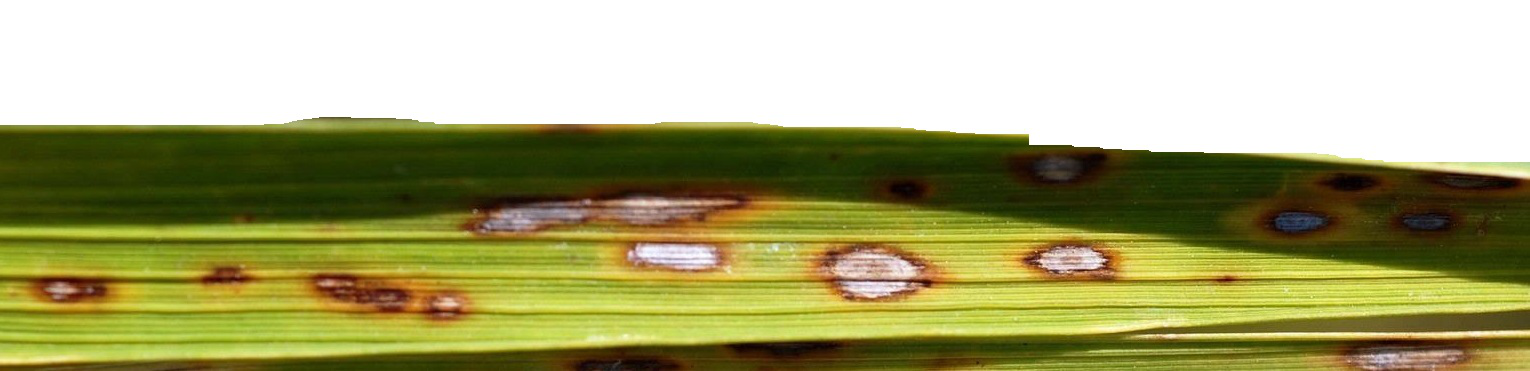

In [10]:
# open the brown spot image sample
brownspot=list(data_dir.glob("Brown spot/*"))
PIL.Image.open(str(brownspot[2]))

### Leaf smut

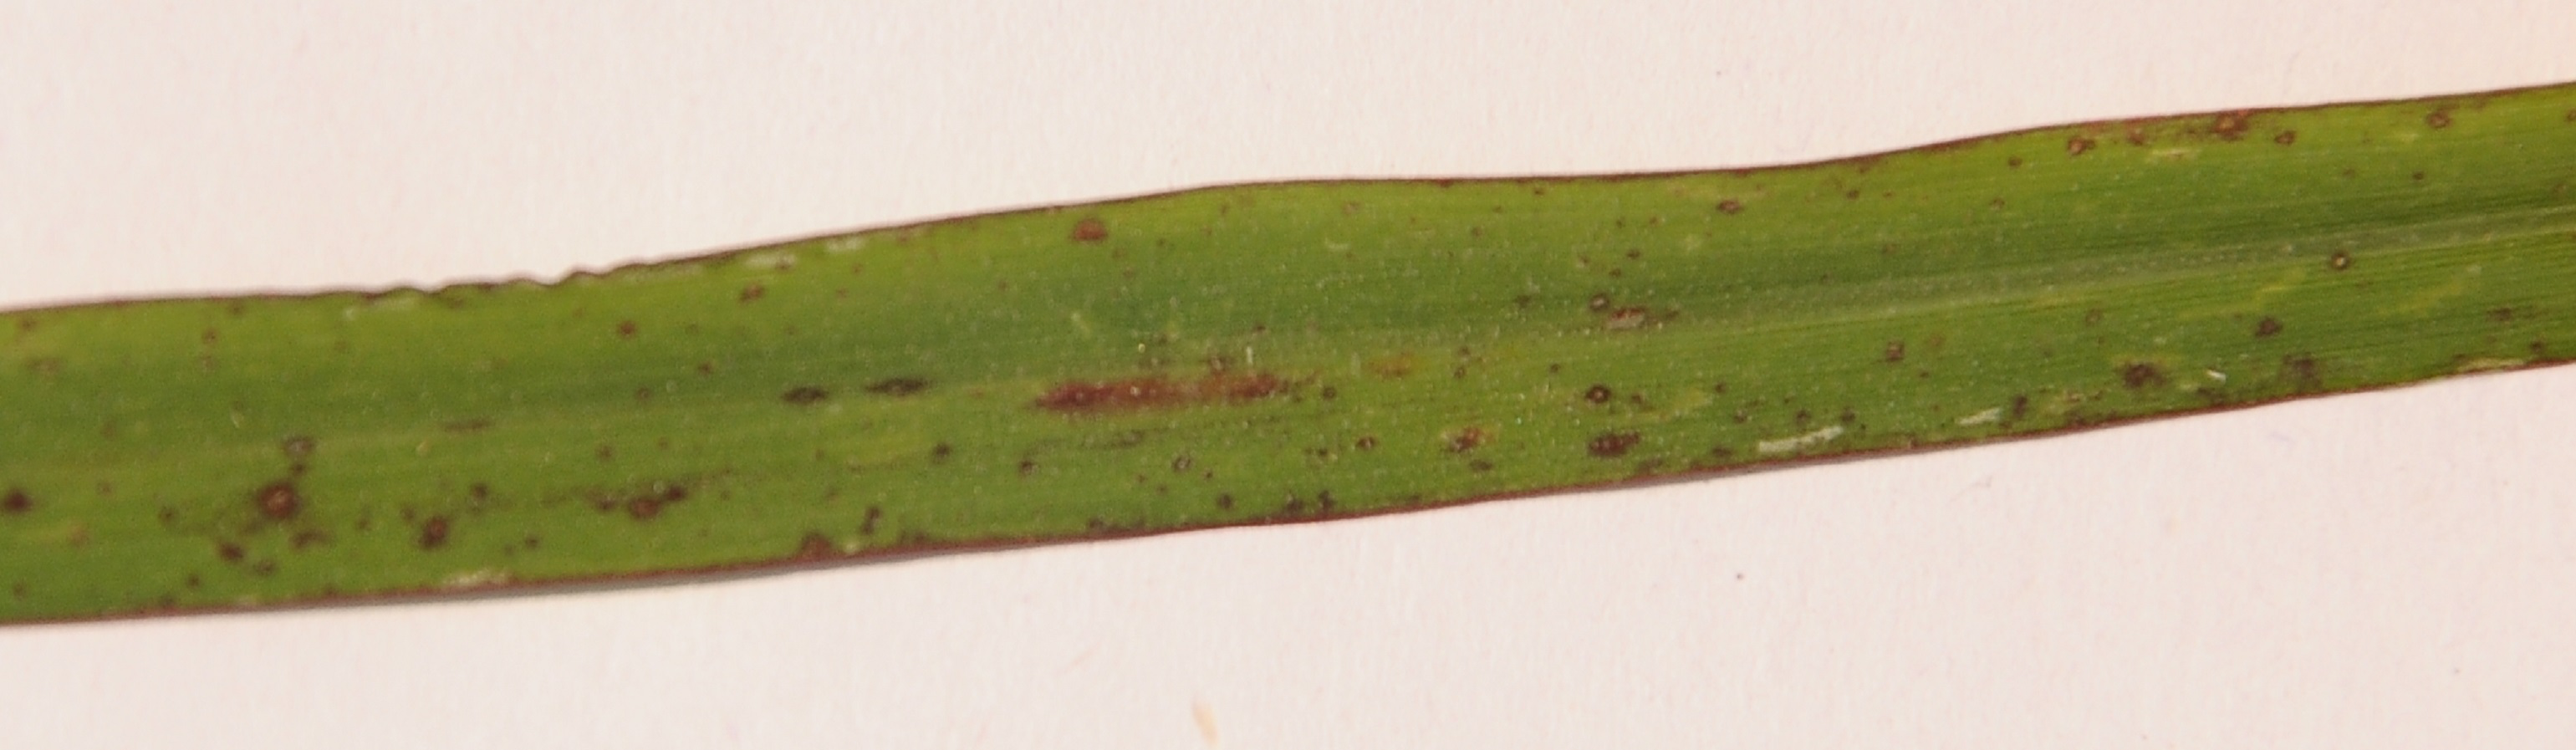

In [11]:
#open the leaf smut sample
leaf =list(data_dir.glob("Leaf smut/*"))
PIL.Image.open(str(leaf[2]))

## 4)Data preprocessing

* reshape the image
* rescale the image size in 0 to 255 into 0 to 1

In [12]:
# Getting the shape of data
total_image.image_shape 

(220, 220, 3)

In [13]:
training_image.image_shape

(220, 220, 3)

In [14]:
# view the 3D matrix format in DSC_0101(sample image)
cv2.imread("D:\\ML dataset\\leaf diseces\\full data\\Brown spot\\DSC_0101.jpg")

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 254, 254],
        [252, 254, 254],
        [251, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [15]:
image,label= training_image.next()
three_dimensional_matrix =image
three_dimensional_matrix 

array([[[[0.94117653, 0.9058824 , 0.8862746 ],
         [0.94117653, 0.91372555, 0.89019614],
         [0.92549026, 0.9058824 , 0.89019614],
         ...,
         [0.9294118 , 0.87843144, 0.854902  ],
         [0.9215687 , 0.86666673, 0.854902  ],
         [0.9294118 , 0.87843144, 0.854902  ]],

        [[0.94117653, 0.9058824 , 0.8862746 ],
         [0.93725497, 0.9058824 , 0.8941177 ],
         [0.9294118 , 0.909804  , 0.8862746 ],
         ...,
         [0.92549026, 0.8745099 , 0.85098046],
         [0.92549026, 0.86666673, 0.8470589 ],
         [0.9215687 , 0.86274517, 0.8431373 ]],

        [[0.93725497, 0.90196085, 0.882353  ],
         [0.94117653, 0.909804  , 0.8980393 ],
         [0.94117653, 0.91372555, 0.89019614],
         ...,
         [0.92549026, 0.8745099 , 0.85098046],
         [0.9294118 , 0.8705883 , 0.85098046],
         [0.9294118 , 0.8588236 , 0.8431373 ]],

        ...,

        [[0.9333334 , 0.91372555, 0.8980393 ],
         [0.9450981 , 0.91372555, 0.9058824 ]

## 5) Build and evaluate the neural network

In [16]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(220,220,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(150, kernel_size=(3, 3), activation='relu',name='conv_3'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [43]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
model.fit(total_image,epochs=10,validation_data=validation_image,batch_size=500)

Epoch 1/10
4/4 [==============================] - 98s 17s/step - loss: 0.5980 - accuracy: 0.7563 - val_loss: 0.4061 - val_accuracy: 0.9565
Epoch 2/10
4/4 [==============================] - 20s 5s/step - loss: 0.4569 - accuracy: 0.8487 - val_loss: 0.3021 - val_accuracy: 0.9565
Epoch 3/10
4/4 [==============================] - 19s 5s/step - loss: 0.3564 - accuracy: 0.8824 - val_loss: 0.1938 - val_accuracy: 0.9565
Epoch 4/10
4/4 [==============================] - 21s 5s/step - loss: 0.2804 - accuracy: 0.8992 - val_loss: 0.6105 - val_accuracy: 0.7391
Epoch 5/10
4/4 [==============================] - 18s 4s/step - loss: 0.3287 - accuracy: 0.8908 - val_loss: 0.3573 - val_accuracy: 0.8261
Epoch 6/10
4/4 [==============================] - 19s 4s/step - loss: 0.3483 - accuracy: 0.8403 - val_loss: 0.0873 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 18s 4s/step - loss: 0.3154 - accuracy: 0.9076 - val_loss: 0.2649 - val_accuracy: 0.8696
Epoch 8/10
4/4 [=================

In [19]:
model.evaluate(validation_image)

1/1 [==============================] - 2s 2s/step - loss: 0.7183 - accuracy: 0.6957


[0.7182689905166626, 0.695652186870575]

In [20]:
from tensorflow.keras.preprocessing import image
img_path = "D:\\ML dataset\\leaf diseces\\full data\\Brown spot\\DSC_0108.jpg"
img = image.load_img(img_path, target_size=(220, 220))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array/255.0


In [21]:
# Predicting 
prediction = model.predict(img_array)
prediction

1/1 [==============================] - 23s 23s/step


array([[1.465407e-06, 9.875306e-01, 1.246804e-02]], dtype=float32)

In [22]:
prediction = model.predict(img_array)
class_label = np.argmax(prediction)
class_label

1/1 [==============================] - 0s 254ms/step


1

##  Making predictions

In [ ]:


class_names = ["Bacterial leaf blight",'Brown spot','Leaf smut']
predicted_class = class_names[class_label]
plt.imshow(img)
plt.title('Predicted class: '+ predicted_class)
plt.show()

Brown spot


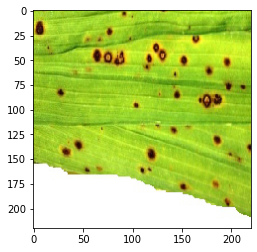

In [24]:
if class_label==0:
    print("Bacterial leaf blight")
elif class_label==1:
    print("Brown spot")
elif class_label==2:
    print("Leaf smut")
plt.imshow(img)
plt.show()

# Making the prediction wether the model predicted properly or not

1/1 [==============================] - 0s 97ms/step


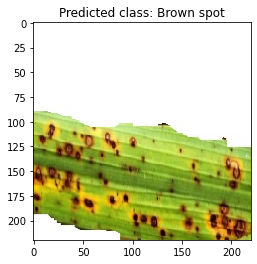

1/1 [==============================] - 0s 103ms/step


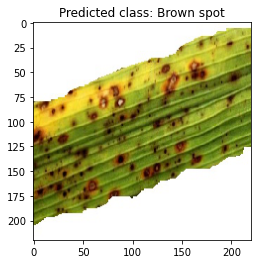

1/1 [==============================] - 0s 85ms/step


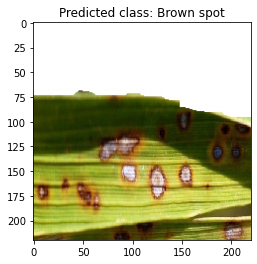

1/1 [==============================] - 0s 100ms/step


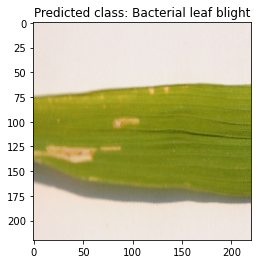

1/1 [==============================] - 0s 81ms/step


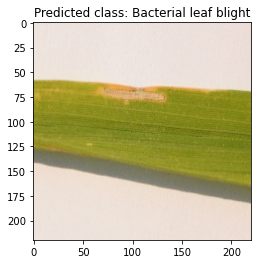

1/1 [==============================] - 0s 87ms/step


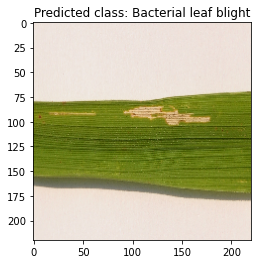

1/1 [==============================] - 0s 82ms/step


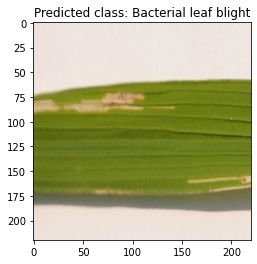

1/1 [==============================] - 0s 85ms/step


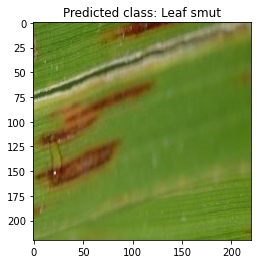

1/1 [==============================] - 0s 85ms/step


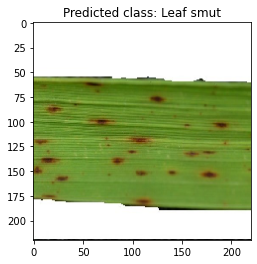

1/1 [==============================] - 0s 84ms/step


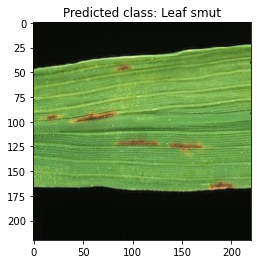

In [47]:
path="D:\ML dataset\leaf diseces\\test"
for i in os.listdir(path):
    img=image.load_img(path+"//"+i,target_size=(220,220,3))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array/255.0
    prediction = model.predict(img_array)
    class_label = np.argmax(prediction)
    class_names = ["Bacterial leaf blight",'Brown spot','Leaf smut']
    predicted_class = class_names[class_label]
    plt.title('Predicted class: '+ predicted_class)
    plt.imshow(img)    
    plt.show()
